In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import os
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, f1_score, ConfusionMatrixDisplay

data = pd.read_csv('dataset/KU-HAR/3.Time_domain_subsamples/KU-HAR_time_domain_subsamples_subset.csv', header=None)
activity_labels = [
    'Stand',
    'Sit',
    'Talk-sit',
    'Talk-stand',
    'Stand-sit',
    'Lay',
    'Lay-stand',
    'Pick',
    'Jump',
    'Push-up',
    'Sit-up',
    'Walk',
    'Walk-backward',
    'Walk-circle',
    'Run',
    'Stair-up',
    'Stair-down',
    'Table-tennis'
]
#print(data.head())
sensor_data = data.iloc[:, :1800].to_numpy()
labels = data.iloc[:,1800].to_numpy()
#(sensor_data.shape[0])

In [6]:
sensor_index = [
    (0, 300),    #acc_x
    (300, 600),   #acc_y
    (600, 900),   #acc_z
    (900, 1200),  #gyro_x
    (1200, 1500), #gyro_y
    (1500, 1800)  #gyro_z
]

feature_list = []

for i in range(sensor_data.shape[0]):
    segment_row = sensor_data[i]
    segment_features = []
    for j in range(len(sensor_index)):
        start, end = sensor_index[j]
        data = segment_row[start:end]

        segment_features.append(np.mean(data))
        segment_features.append(np.min(data))
        segment_features.append(np.max(data))
        segment_features.append(np.std(data))
        segment_features.append(np.median(data))
        segment_features.append(stats.median_abs_deviation(data)) # mad
        segment_features.append(np.sqrt(np.mean(data**2))) # rms
        segment_features.append(np.sum(data**2)) # enerji
        
        hist, _ = np.histogram(data, bins=10, density=True)
        segment_features.append(stats.entropy(hist))  # entropi

    feature_list.append(segment_features)

feature_extraction = pd.DataFrame(feature_list)
feature_names = ['mean', 'min', 'max', 'std', 'median', 'mad', 'rms', 'energy', 'entropy']
axis_name = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']

column_names = [f'{axis}_{feat}' for axis in axis_name for feat in feature_names]
feature_extraction.columns = column_names
y_labels = labels

# print(feature_extraction.shape)
# print(feature_extraction.head())
#print(y_labels)

In [7]:
x_train, x_test, y_train, Y_Tesst = train_test_split(feature_extraction, y_labels, test_size=0.3, random_state=42,stratify =y_labels)

scaler = joblib.load('models/kuhar/standard_scaler.joblib')
pca = joblib.load('models/kuhar/pca_transformer.joblib')

#StandardScaler (SVM, KNN, MLP)
x_test_scaled=scaler.transform(x_test)

#PCA
x_test_pca=pca.transform(x_test)
x_test_scaled_pca = pca.transform(x_test_scaled)

c:\Users\aylin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(



 Model: KNN_With_PCA_kuhar.joblib
Accuracy: 0.3252

               precision    recall  f1-score   support

        Stand       0.16      0.53      0.25        77
          Sit       0.18      0.45      0.25        77
     Talk-sit       0.24      0.38      0.29        78
   Talk-stand       0.45      0.71      0.55        77
    Stand-sit       0.21      0.40      0.28        78
          Lay       0.23      0.25      0.24        77
    Lay-stand       0.27      0.27      0.27        78
         Pick       0.34      0.29      0.32        78
         Jump       0.82      0.58      0.68        77
      Push-up       0.75      0.35      0.47        78
       Sit-up       0.41      0.19      0.26        78
         Walk       0.44      0.33      0.38        78
Walk-backward       1.00      0.14      0.25        78
  Walk-circle       0.67      0.21      0.31        78
          Run       0.83      0.38      0.53        78
     Stair-up       0.40      0.08      0.13        78
   Stair-do

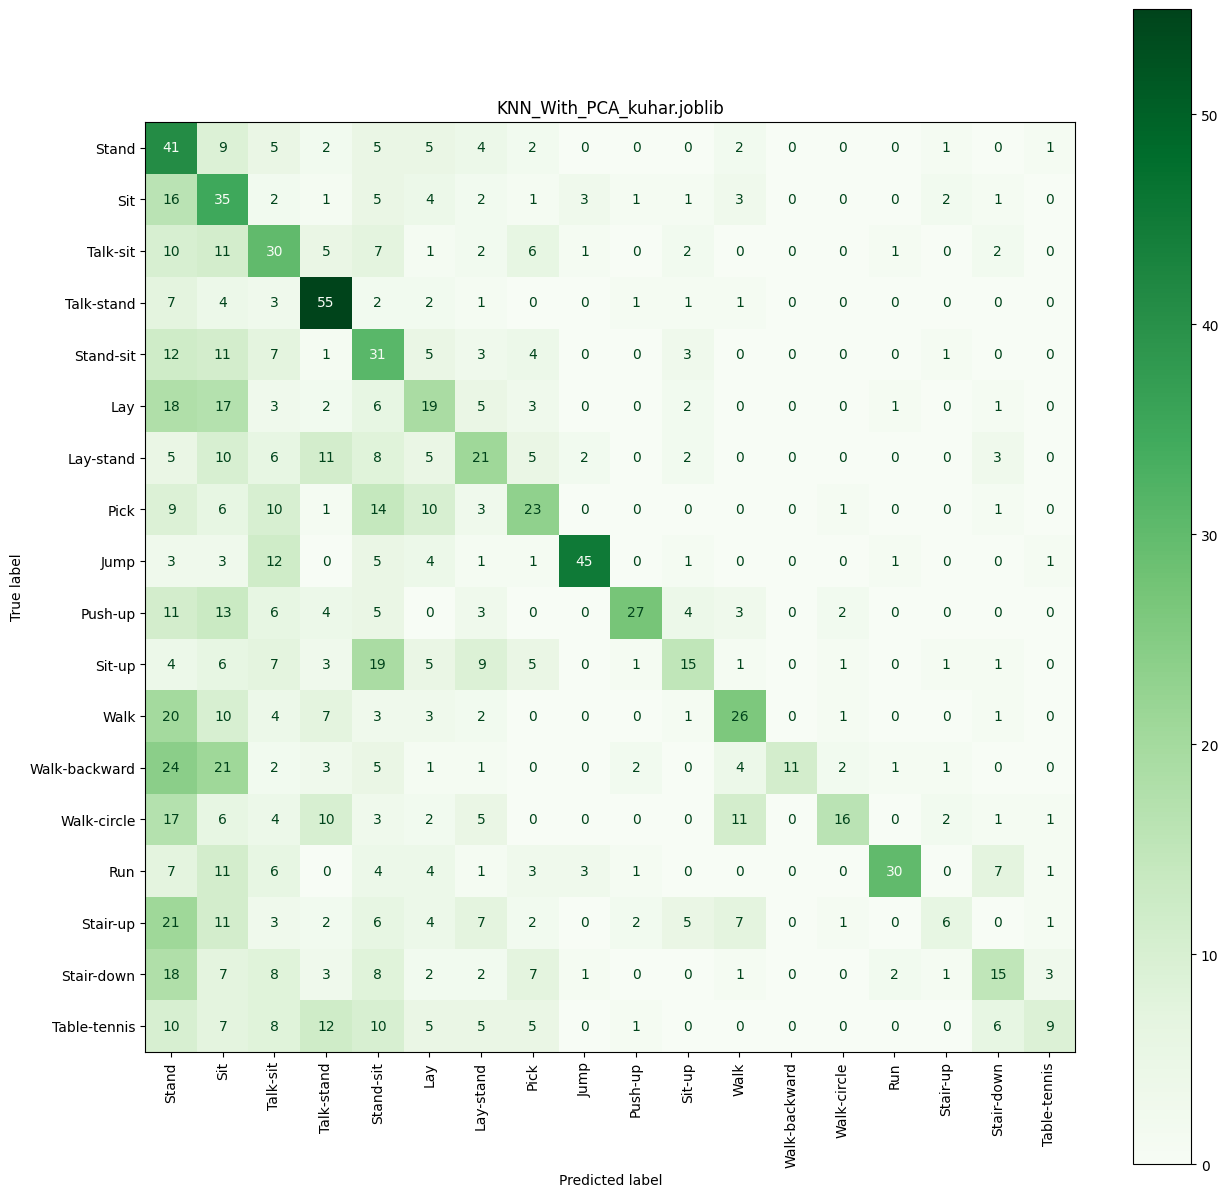


 Model: KNN_Without_PCA_kuhar.joblib
Accuracy: 0.4167

               precision    recall  f1-score   support

        Stand       0.19      0.60      0.29        77
          Sit       0.28      0.40      0.33        77
     Talk-sit       0.27      0.41      0.33        78
   Talk-stand       0.54      0.77      0.63        77
    Stand-sit       0.27      0.51      0.36        78
          Lay       0.36      0.42      0.39        77
    Lay-stand       0.30      0.26      0.28        78
         Pick       0.42      0.36      0.39        78
         Jump       0.82      0.69      0.75        77
      Push-up       0.80      0.42      0.55        78
       Sit-up       0.62      0.32      0.42        78
         Walk       0.56      0.68      0.62        78
Walk-backward       0.75      0.12      0.20        78
  Walk-circle       0.59      0.21      0.30        78
          Run       0.81      0.37      0.51        78
     Stair-up       0.60      0.42      0.50        78
   Stair

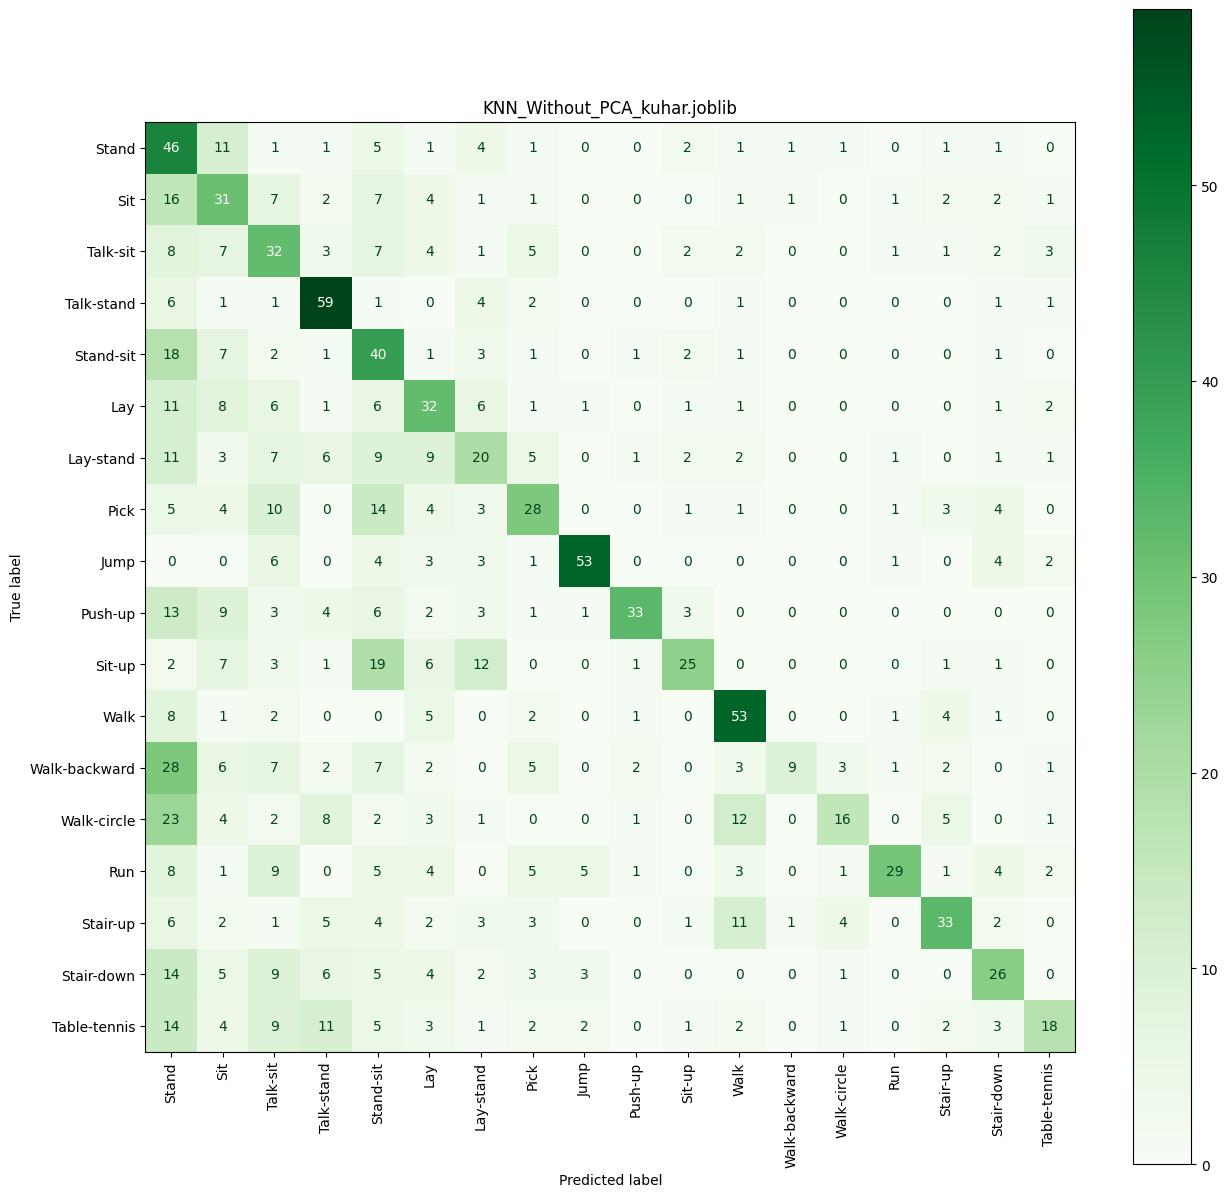


 Model: MLP_HP_optimization_kuhar.joblib
Accuracy: 0.5533

               precision    recall  f1-score   support

        Stand       0.43      0.39      0.41        77
          Sit       0.42      0.57      0.49        77
     Talk-sit       0.72      0.53      0.61        78
   Talk-stand       0.61      0.78      0.68        77
    Stand-sit       0.42      0.73      0.54        78
          Lay       0.58      0.60      0.59        77
    Lay-stand       0.42      0.62      0.50        78
         Pick       0.55      0.65      0.60        78
         Jump       0.86      0.94      0.89        77
      Push-up       0.88      0.49      0.63        78
       Sit-up       0.53      0.26      0.34        78
         Walk       0.40      0.76      0.52        78
Walk-backward       0.69      0.23      0.35        78
  Walk-circle       0.67      0.03      0.05        78
          Run       0.96      0.87      0.91        78
     Stair-up       0.40      0.42      0.41        78
   S

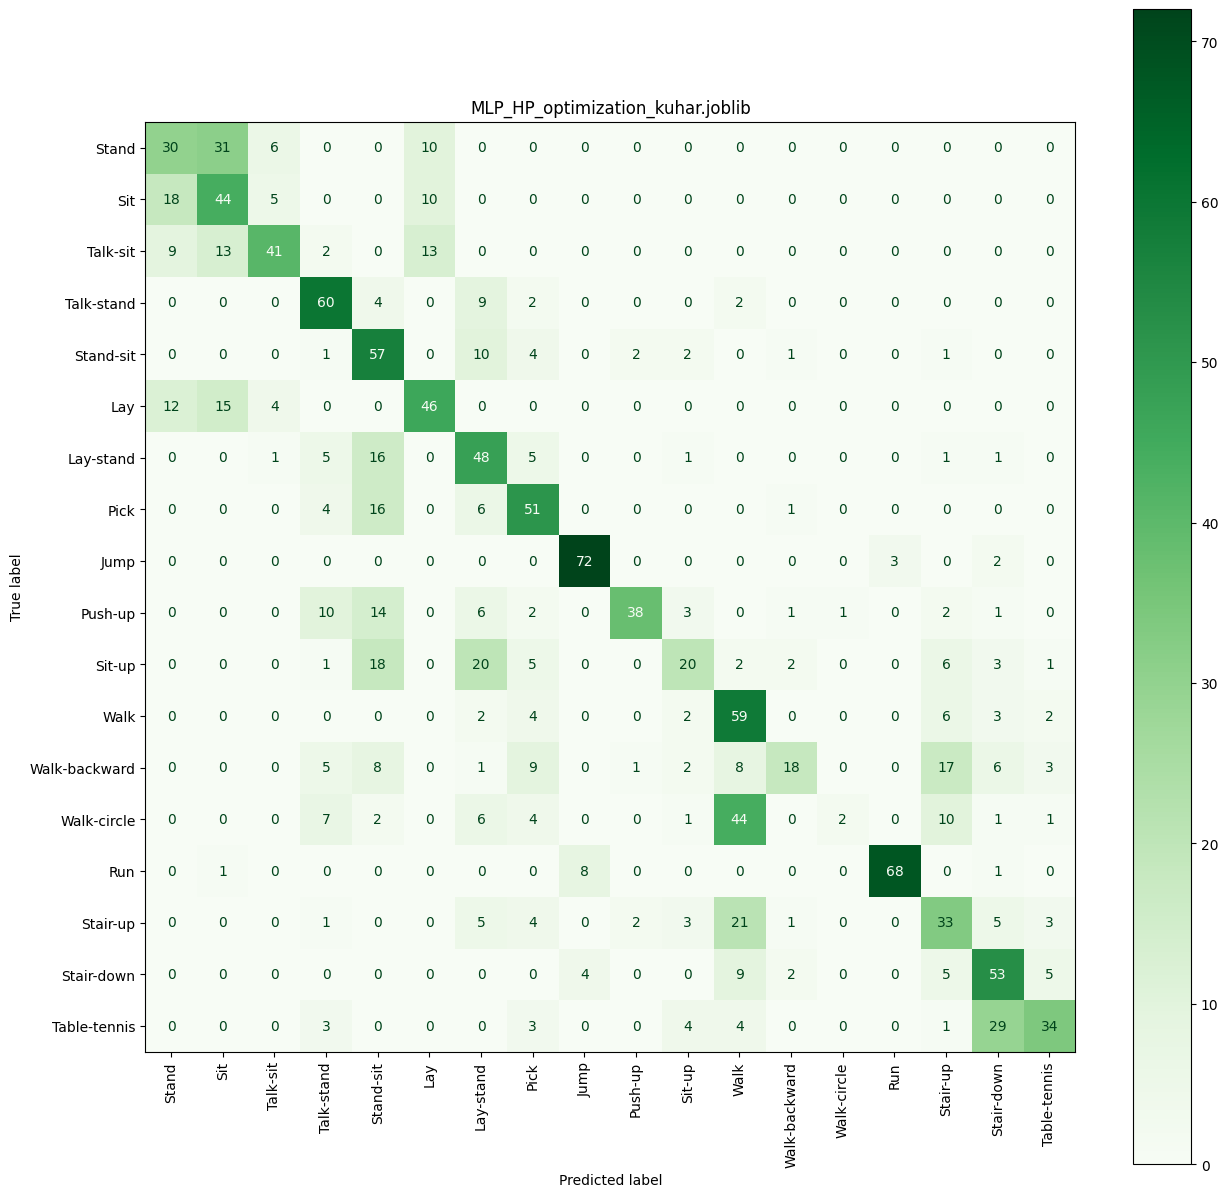


 Model: MLP_With_PCA_kuhar.joblib
Accuracy: 0.5096

               precision    recall  f1-score   support

        Stand       0.41      0.42      0.41        77
          Sit       0.46      0.60      0.52        77
     Talk-sit       0.62      0.42      0.50        78
   Talk-stand       0.49      0.81      0.61        77
    Stand-sit       0.39      0.74      0.52        78
          Lay       0.55      0.56      0.55        77
    Lay-stand       0.45      0.47      0.46        78
         Pick       0.49      0.55      0.52        78
         Jump       0.85      0.90      0.87        77
      Push-up       0.64      0.36      0.46        78
       Sit-up       0.39      0.24      0.30        78
         Walk       0.35      0.74      0.48        78
Walk-backward       0.65      0.14      0.23        78
  Walk-circle       0.00      0.00      0.00        78
          Run       0.92      0.88      0.90        78
     Stair-up       0.30      0.28      0.29        78
   Stair-do

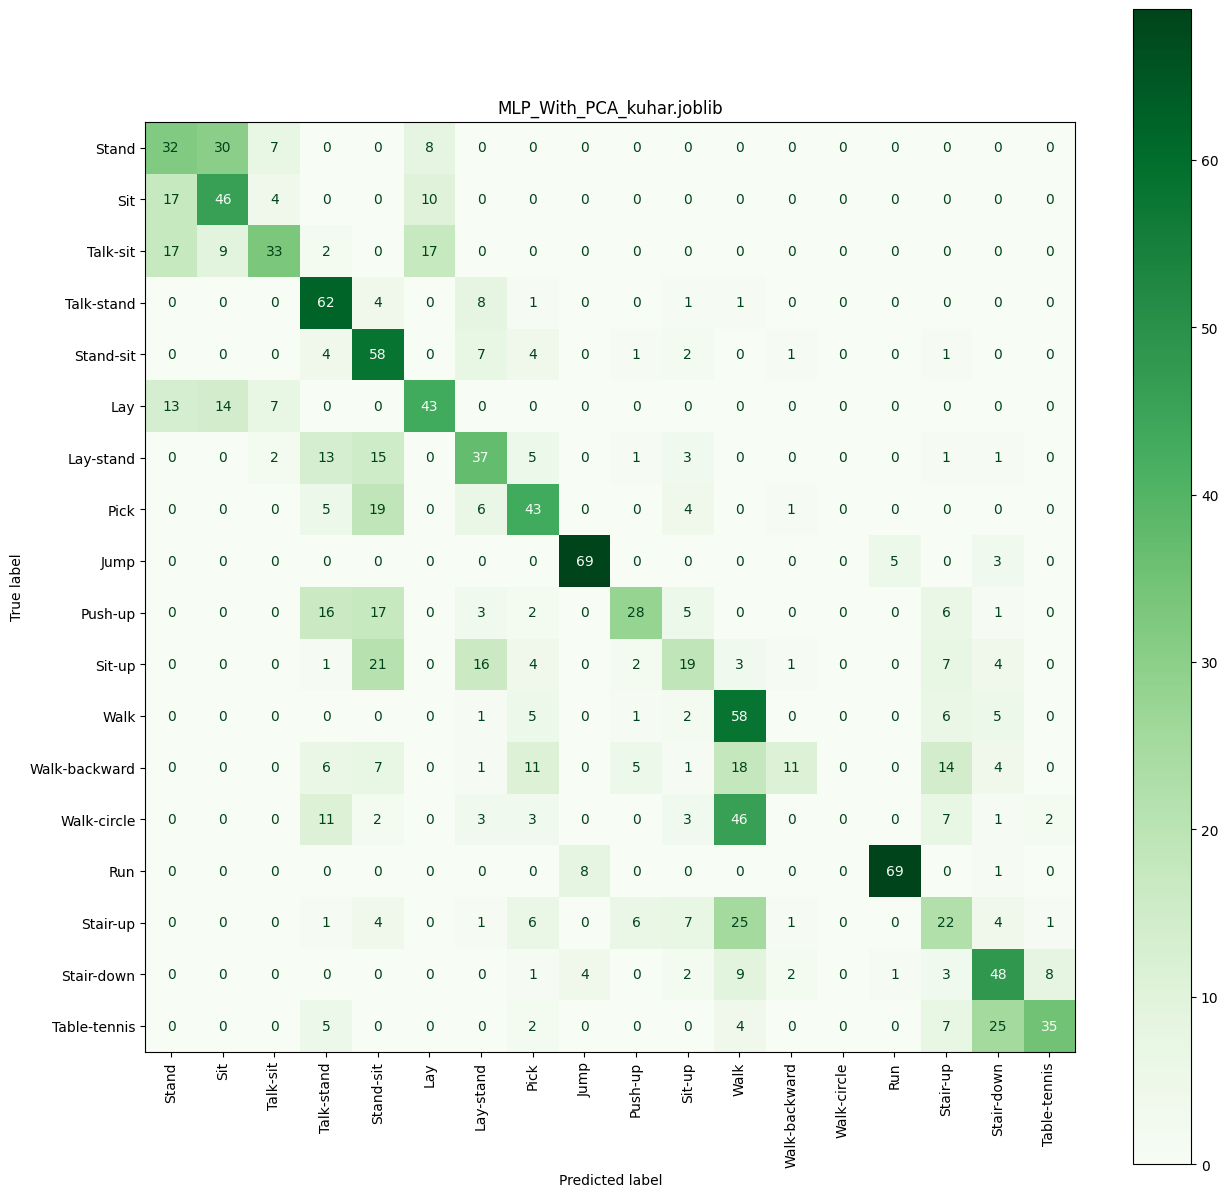


 Model: MLP_Without_PCA_kuhar.joblib
Accuracy: 0.6447

               precision    recall  f1-score   support

        Stand       0.39      0.45      0.42        77
          Sit       0.44      0.47      0.46        77
     Talk-sit       0.58      0.47      0.52        78
   Talk-stand       0.73      0.91      0.81        77
    Stand-sit       0.56      0.86      0.68        78
          Lay       0.60      0.56      0.58        77
    Lay-stand       0.71      0.77      0.74        78
         Pick       0.59      0.74      0.66        78
         Jump       0.95      0.92      0.93        77
      Push-up       0.89      0.62      0.73        78
       Sit-up       0.84      0.62      0.71        78
         Walk       0.46      0.74      0.57        78
Walk-backward       0.77      0.38      0.51        78
  Walk-circle       0.88      0.09      0.16        78
          Run       0.94      0.92      0.93        78
     Stair-up       0.50      0.58      0.54        78
   Stair

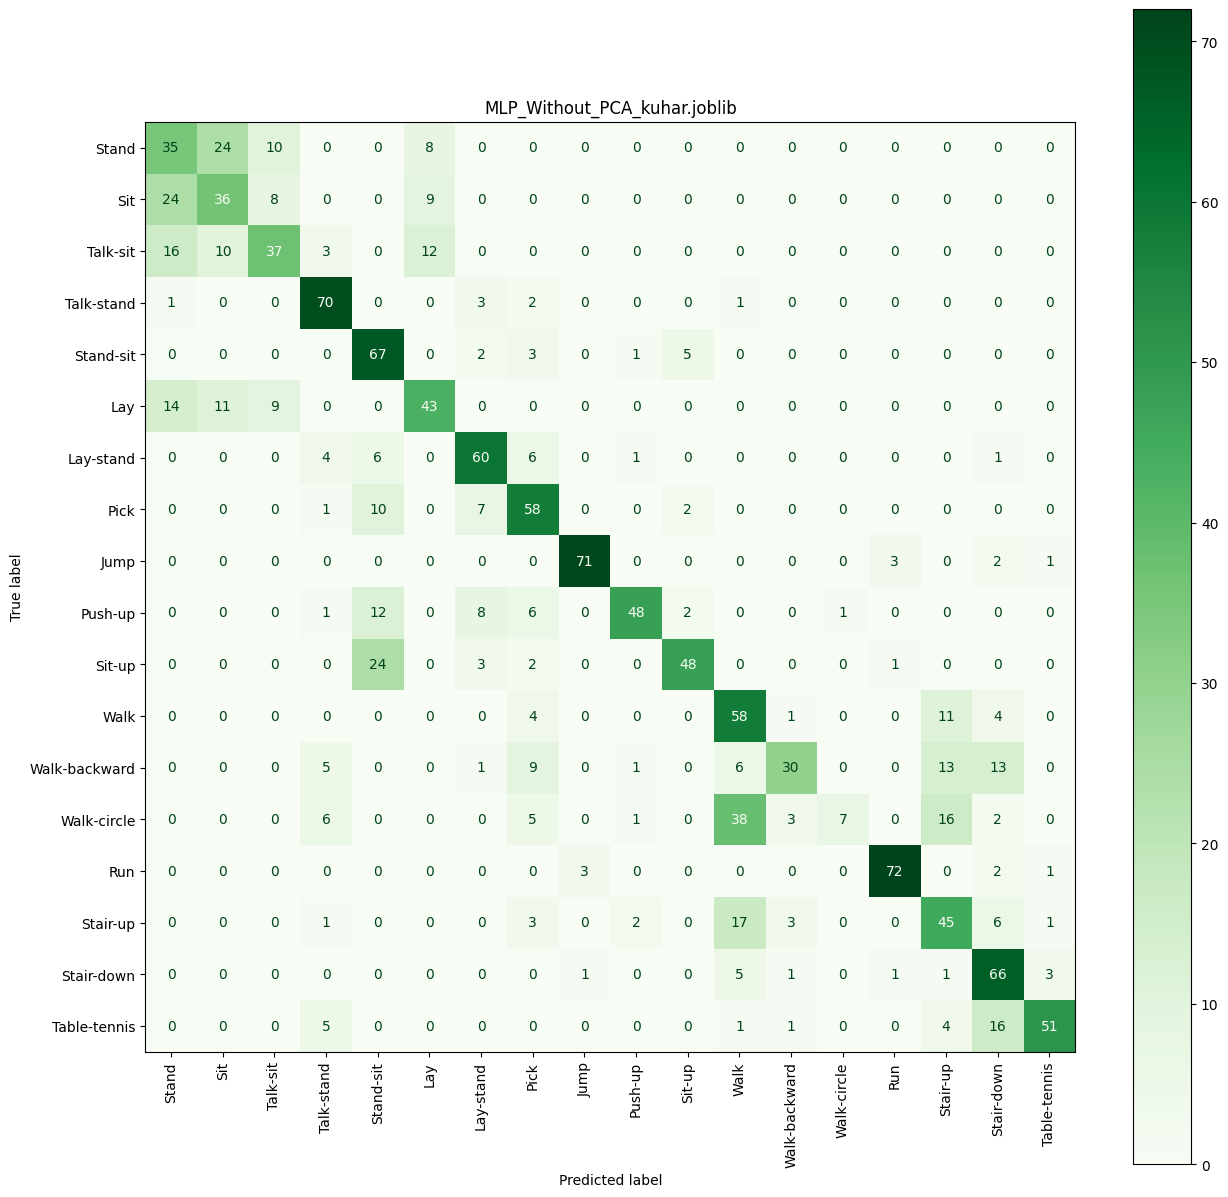


 Model: Naive Bayes_With_PCA_kuhar.joblib


ValueError: X has 9 features, but GaussianNB is expecting 2 features as input.

In [ ]:
def evaluate_model(model, X_test, y_test, name):
    print(f"\nModel: {name}")
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}\n")
    print(classification_report(y_test, y_pred, target_names=activity_labels, zero_division=0))
    print("Confusion Matrix:")
    figure, axes = plt.subplots(figsize=(15,15))
    ConfusionMatrixDisplay.from_predictions(
        y_test,
        y_pred,
        display_labels=activity_labels,
        cmap='Greens',  
        xticks_rotation='vertical', 
        ax=axes 
    )
    plt.title(name)
    plt.show()

model_dir = 'models/kuhar'
for file in sorted(os.listdir(model_dir)):
    if file.endswith('.joblib'):
        model = joblib.load(os.path.join(model_dir, file))
        file_lower = file.lower()
        if 'with_pca' in file_lower:
            if any(x in file_lower for x in ['svm', 'knn', 'mlp']):
                X_test = x_test_scaled_pca
            else:
                X_test = x_test_pca
        elif 'hp_optimization' in file_lower:
            if any(x in file_lower for x in ['svm', 'knn', 'mlp']):
                X_test = x_test_scaled_pca
            else:
                X_test = x_test_pca
        else:  # without pca
            if any(x in file_lower for x in ['svm', 'knn', 'mlp']):
                X_test = x_test_scaled
            else:
                X_test = x_test

        evaluate_model(model, X_test, Y_Tesst, name=file)